<a href="https://colab.research.google.com/github/Eakiz04/MAT421/blob/main/ModuleH_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module H_2 - Eric Kizior

# 22.4 - Numerical Error and Instability

Two main issues to consider with regard to integration schemes for ODEs:
*    **Accuracy:** Refers to a scheme's ability to get close to the exact solution, which is usually unknown, as a function of the step size. Uses the notation $O(h^p)$
*    **Stability:** A scheme's ability to keep the error from growing as it integrates forward in time. If the error does not grow, then the scheme is stable; otherwise it is unstable. Some integration schemes are stable for certain choices of $h$ and unstable for others; these integration schemes are also referred to as unstable

Example: Demonstrate stability by comparing the use of Euler Explicit, Euler Implicit, and Trapezoidal Formulas to solve the mass-spring system equation over the time interval $[0,8]$  in increments of 0.1 and for an initial solution of $S_0= \begin{bmatrix}
3 \\
0
\end{bmatrix}$. For the model parameters, the mass is $m=5kg$, the spring constant $k=9\frac{N}{M}$, and angular frequency $ω=\sqrt{\frac{k}{m}} \approx 1.34$

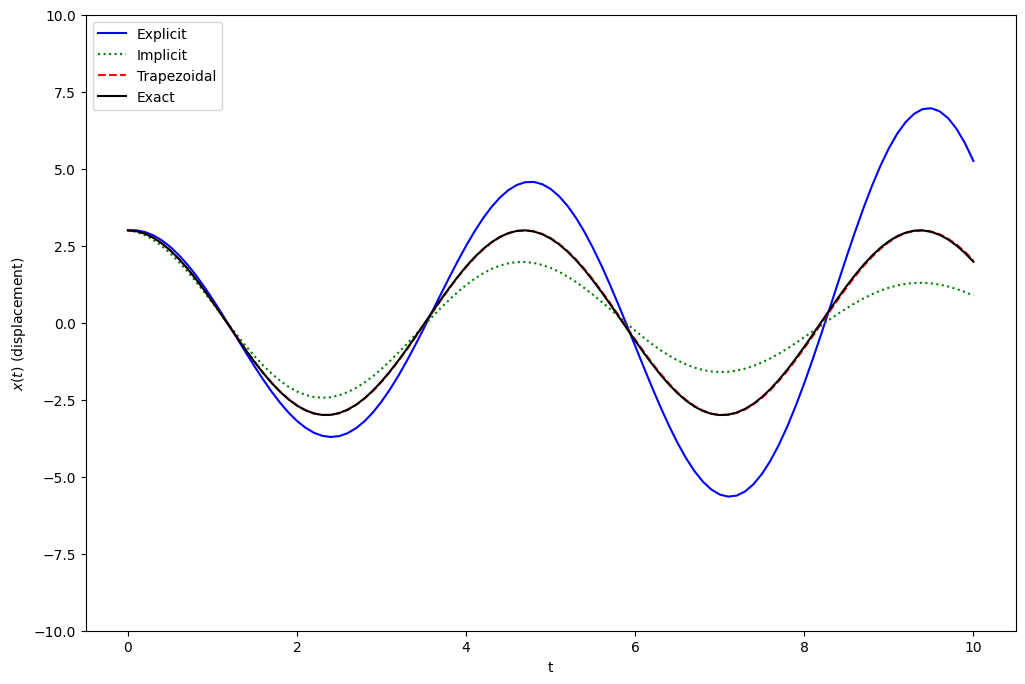

In [24]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

%matplotlib inline
# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 10.1, h)
# oscillation freq. of a spring system
m = 5  # Mass (kg)
k = 9  # Spring constant (N/m)
w = np.sqrt(k/m)  # Angular frequency

s0 = np.array([[3], [0]])

m_e = np.array([[1, h],
               [-(k/m)*h, 1]])
m_i = inv(np.array([[1, -h],
               [(k/m)*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2],
    [(k/m)*h/2, 1]])), np.array(
      [[1, h/2], [-(k/m)*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, 3 * np.cos(w * t), 'k')
plt.ylim([-10, 10])
plt.xlabel('t')
plt.ylabel('$x(t)$ (displacement)')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

Explicit Euler: Diverges due to instability.

Implicit Euler: Overdamped, stable but inaccurate.

Trapezoidal: Stable and accurately reflects the exact solution

# Predictor-Corrector and Runge Kutta Methods

*    **Predictor-corrector:** Methods of solving initial value problems improve the approximation accuracy of non-predictor-corrector methods by querying the $F$ function several times at different locations (predictions), and then using a weighted average of the results (corrections) to update the state
*    **Predictor:** An explicit formula and first estimates the solution at $t_{j+1}$. Use Euler method or some other methods to finish this step.
*    **Corrector:** After we obtain the solution $S(t_{j+1})$, we can apply the corrector to improve the accuracy. Using the found $S(t_{j+1})$ on the right-hand side of an otherwise implicit formula, the corrector can calculate a new, more accurate solution.
*    **Midpoint Method:** Has a predictor step $S(t_j+\frac{h}{2})=S(t_j) + \frac{h}{2} F(t_j,S(t_j))$, a prediction of the solution value halfway between $t_j$ and $t_{j+1}$. The corrector step $S(t_{j+1})=S(t_j) + h F(t_j + \frac{h}{2},S(t_j + \frac{h}{2}))$ which computes the solution at $S(t_{j+1})$ from $S(t_j)$ but using the derivative from $S(t_j + \frac{h}{2})$
*    **Runge Kutta Methods:** Are one of the most widely used methods for solving ODEs. Recall that the Euler method uses the first two terms in Taylor series to approximate the numerical integration, which is linear. We can greatly improve the accuracy of numerical integration if we keep more terms of the series in $S(t_{j+1})=S(t_j+h)=S(t_j)+S'(t_j)h+ \frac{1}{2!} S''(t_j)h^2 + ... + \frac{1}{n!} S^{(n)}(t_j)h^n$. In order to get this more accurate solution, we need to derive some of the expressions in this, but this can be avoided using the RK methods, which is based on truncated Taylor series, but not require computation of these higher derivatives
*    **Second order Runge Kutta method:**

$\hspace{5cm} k_1= F(t_j,S(t_j))$

$\hspace{5cm} k_2= F(t_j + ph, S(t_j) + qhk_1)$, thus

$\hspace{5cm} S(t_{j+1})=S(t_j) + \frac{1}{2} (k_1+k_2)h$

*    **Fourth-order Runge Kutta method:**

$\hspace{5cm} k_1= F(t_j,S(t_j))$

$\hspace{5cm} k_2= F(t_j + \frac{h}{2}, S(t_j) + \frac{1}{2}hk_1)$

$\hspace{5cm} k_3= F(t_j + \frac{h}{2}, S(t_j) + \frac{1}{2}hk_2)$

$\hspace{5cm} k_4= F(t_j + h, S(t_j) + hk_3)$, thus

$\hspace{5cm} S(t_{j+1})=S(t_j) + \frac{h}{6} (k_1+2k_2 + 2k_3 + k_4)$